In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions

## __1 - Business Problem__  
___Prepare a classification model using SVM for salary data___  

## __2 - Data collection and description__ 

In [2]:
test_tmp = pd.read_csv("SalaryData_Test(1).csv")
train_tmp = pd.read_csv("SalaryData_Train(1).csv.crdownload")

In [3]:
df_tmp = test_tmp.append(train_tmp)

C:\Users\Pavan R\AppData\Local\Temp\ipykernel_79564\2035400017.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_tmp = test_tmp.append(train_tmp)


In [4]:
test = test_tmp.copy()
train = train_tmp.copy()

In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
str_c = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [8]:
number = LabelEncoder()

In [9]:
for i in str_c:
    train[i]= number.fit_transform(train[i])
    test[i]=number.fit_transform(test[i])

In [10]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K


In [11]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [12]:
mapping = {' >50K': 1, ' <=50K': 2}

In [13]:
train = train.replace({'Salary': mapping})
test = test.replace({'Salary': mapping})

In [14]:
df = train.append(test) 

C:\Users\Pavan R\AppData\Local\Temp\ipykernel_79564\2767323617.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [15]:
df1 = df.copy()

In [16]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,2
1,50,4,9,13,2,3,0,4,1,0,0,13,37,2
2,38,2,11,9,0,5,1,4,1,0,0,40,37,2
3,53,2,1,7,2,5,0,2,1,0,0,40,37,2
4,28,2,9,13,2,9,5,2,0,0,0,40,4,2


In [17]:
df1.shape

(26096, 14)

In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26096.0,38.583423,13.255935,17.0,28.0,37.0,47.0,90.0
workclass,26096.0,2.211872,0.962122,0.0,2.0,2.0,2.0,6.0
education,26096.0,10.320279,3.818738,0.0,9.0,11.0,12.0,15.0
educationno,26096.0,10.114769,2.545025,1.0,9.0,10.0,13.0,16.0
maritalstatus,26096.0,2.584496,1.501838,0.0,2.0,2.0,4.0,6.0
occupation,26096.0,5.985553,4.032212,0.0,2.0,6.0,9.0,13.0
relationship,26096.0,1.409756,1.595998,0.0,0.0,1.0,3.0,5.0
race,26096.0,3.682135,0.829572,0.0,4.0,4.0,4.0,4.0
sex,26096.0,0.675851,0.468065,0.0,0.0,1.0,1.0,1.0
capitalgain,26096.0,1100.407419,7549.193074,0.0,0.0,0.0,0.0,99999.0


In [19]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

### Finding Correlation

In [20]:
corr = df1.corr()

<AxesSubplot:>

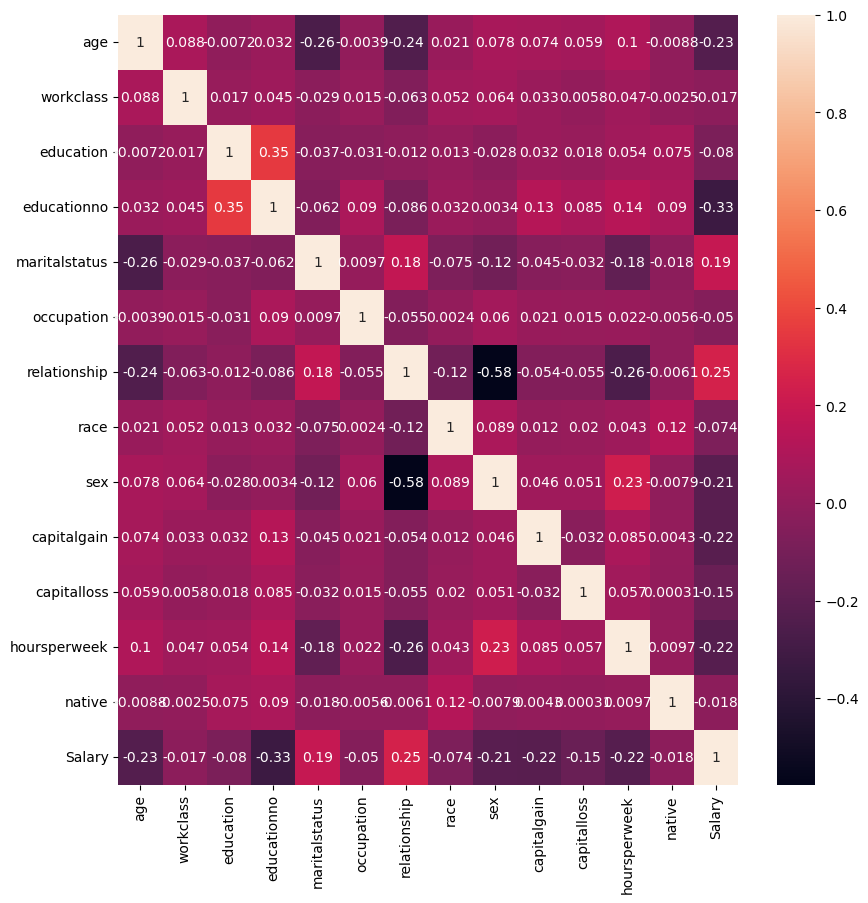

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [22]:
plt.rcParams["figure.figsize"] = 9,5

In [23]:
# Check for duplicates in the 'educationno' column
duplicates = df1['educationno'].duplicated(keep='first')
if duplicates.any():
    print("Duplicates found in 'educationno' column. Consider handling them.")
else:
    ax = sns.kdeplot(df1['educationno'], shade=True, color='g')
    plt.xticks([i for i in range(0, 20, 1)])
    plt.show()


Duplicates found in 'educationno' column. Consider handling them.


### The Data is negatively skewed and has low kurtosis value  
### Most of people have eduction Number of years of education 9 - 10

In [24]:
dfa = df_tmp[df_tmp.columns[0:13]]
obj_column = dfa.select_dtypes(include='object').columns.tolist()

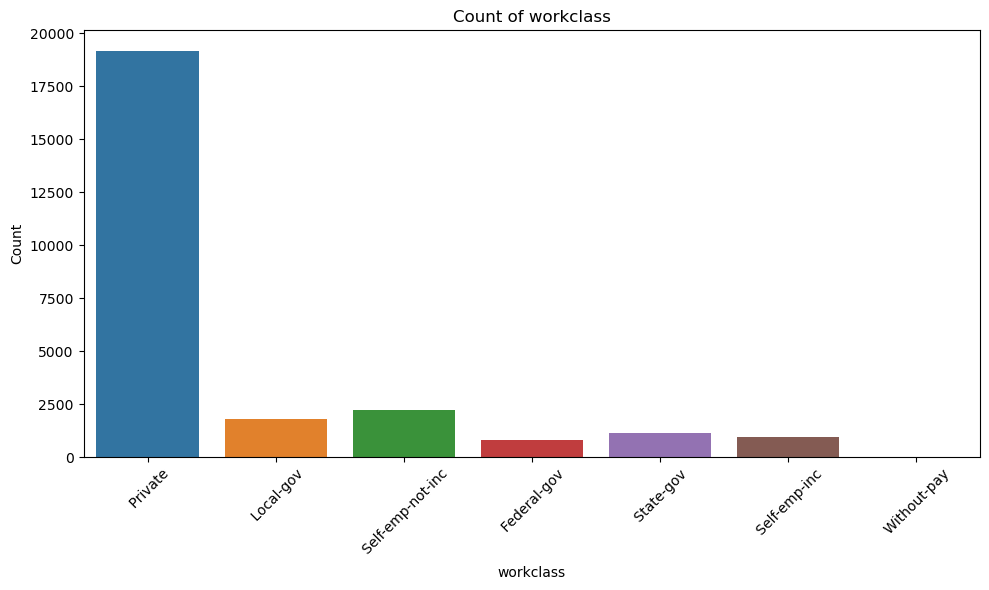

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

dfa = df_tmp[df_tmp.columns[0:13]]
obj_column = dfa.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(10, 6))
sns.countplot(data=dfa, x=obj_column[0])  
plt.xticks(rotation=45)
plt.xlabel(obj_column[0])
plt.ylabel('Count')
plt.title(f'Count of {obj_column[0]}')
plt.tight_layout()
plt.show()


### Majority of the workclass is in Private Sector  
### Also for education mojority of the people have HS graduation or some college degree

In [26]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

Duplicate indices found. Resetting index.


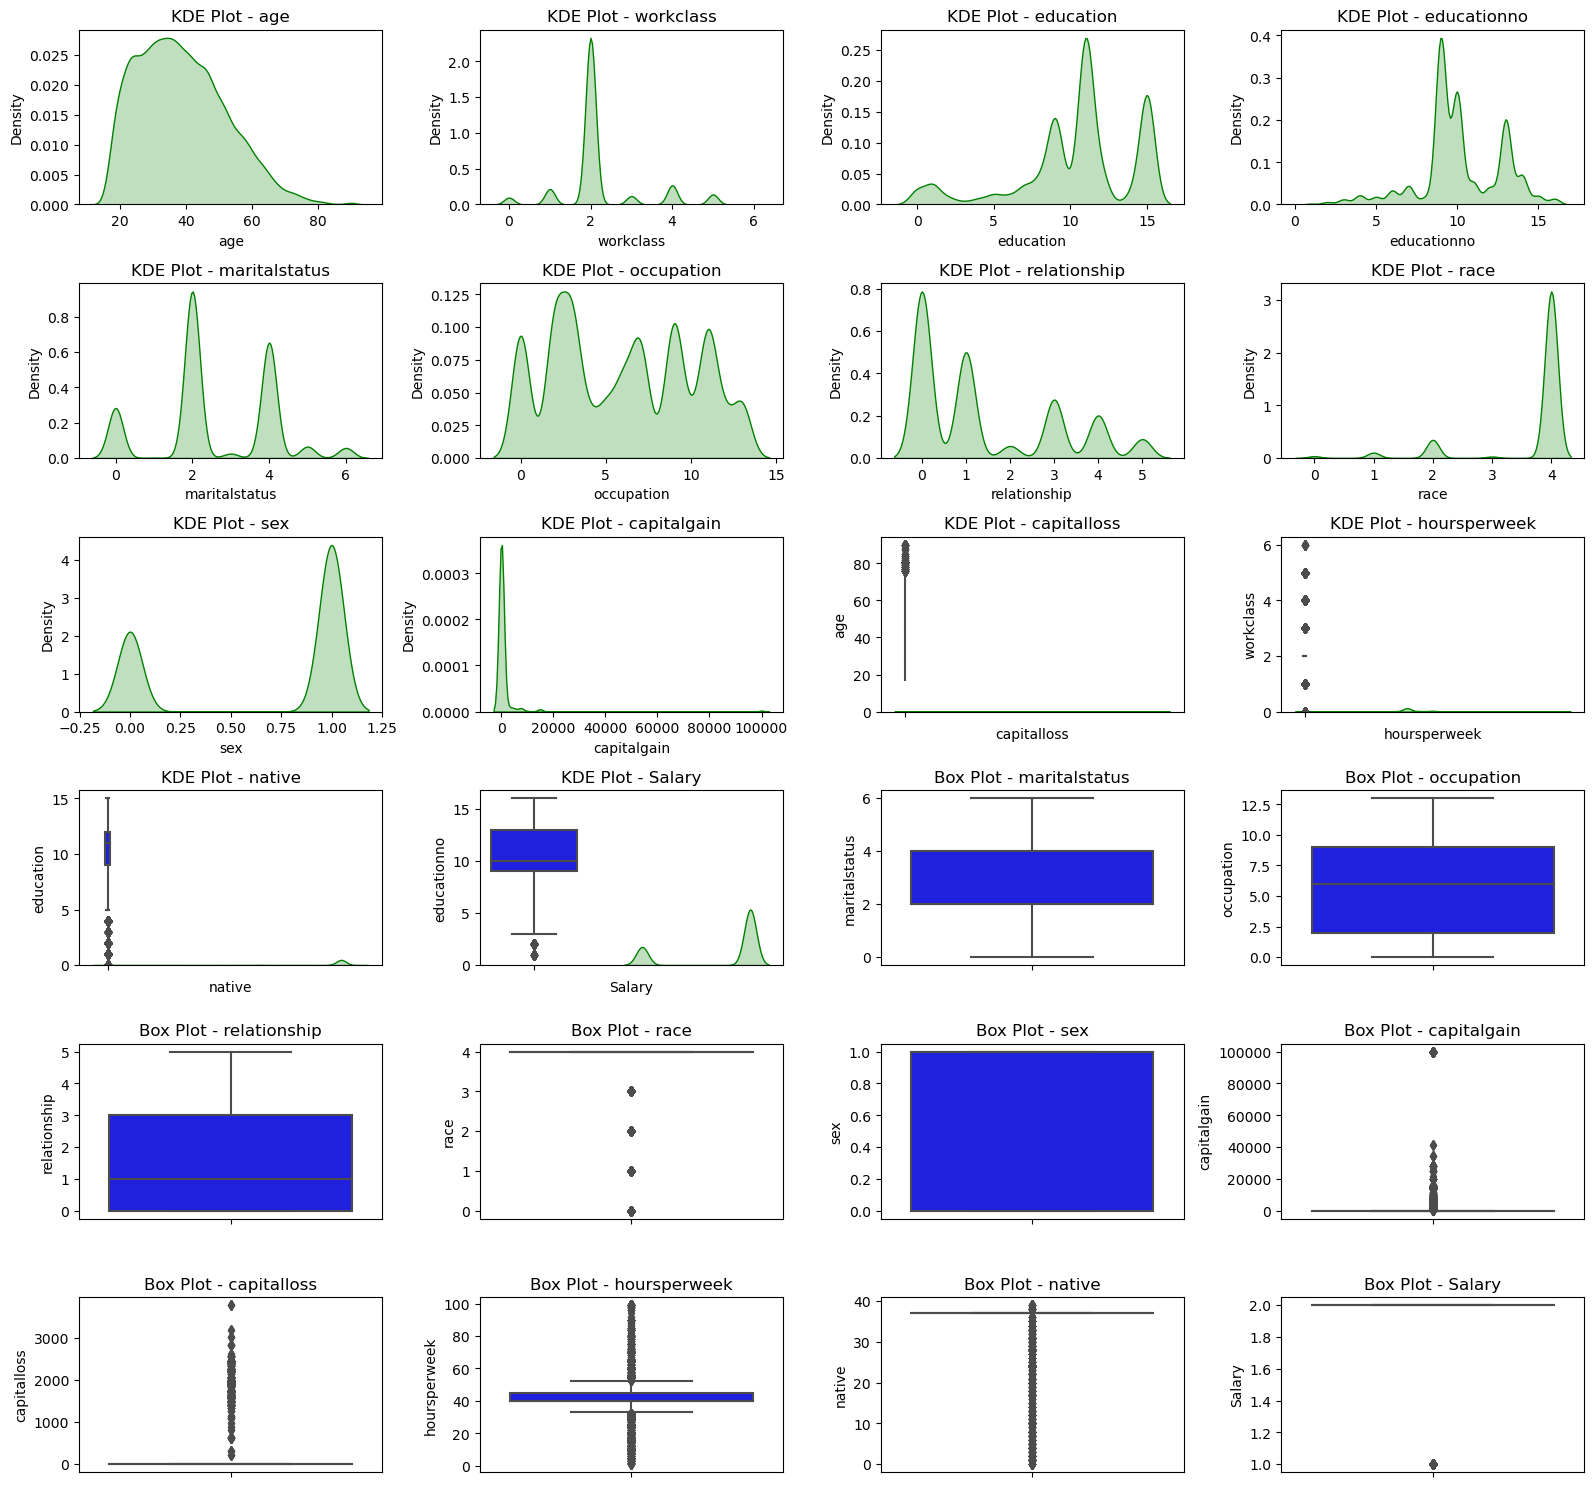

In [27]:
duplicate_indices = df.index[df.index.duplicated()]
if len(duplicate_indices) > 0:
    print("Duplicate indices found. Resetting index.")
    df = df.reset_index(drop=True)


num_columns = df.select_dtypes(include='number').columns.tolist()


plt.figure(figsize=(16, 20))
for i, col in enumerate(num_columns, 1):
    plt.subplot(8, 4, i)
    sns.kdeplot(data=df, x=col, color='g', shade=True)
    plt.title(f'KDE Plot - {col}')
    
    plt.subplot(8, 4, i + 10)
    sns.boxplot(data=df, y=col, color='b')
    plt.title(f'Box Plot - {col}')

plt.tight_layout()
plt.show()


## __3 - SVM__ 

In [28]:
col = df1.columns

In [29]:
x_train = train[col[0:13]]
y_train = train[col[13]]
x_test = test[col[0:13]]
y_test = test[col[13]]

In [30]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [31]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

### 3.1 Linear

In [32]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.8041832669322709


### 3.2 Poly

In [33]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.8418990703851261


### 3.3 RBF

In [34]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_rbf))

Accuracy: 0.8336653386454184


### 3.4 Sigmoid

In [35]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.7051128818061089


## __4 - Conclusion__ 

## Poly Model gives the best accuracy  